#### Gestión de objetos espaciales: barrios de Comodoro Rivadavia
Fuente: Dirección General de Catastro. Correcciones de límites, incongruencias y anomalías realizadas por el autor.

Al completar la corrección de los vectores y el ordenamiento de los datos de barrios proveídos por la Dirección General de Catastro (Diciembre, 2024), se obtuvieron 73 capas compuestas por multipoligonos representando las manzanas de cada barrio. Para una mayor facilidad a la hora de indexar y gestionar esta información espacial, se buscó la mejor forma de transformar la capa multipoligono en un único polígono con límites claros que represente el barrio en su totalidad sin errores topológicos ni solapamientos.

Una primera opción fue crear una zona buffer de 50 metros ya disuelta desde el output mismo para obtener un único objeto. Finalmente, realizar una zona buffer negativa de 45 metros con terminaciones cuadradas. Para mayor agilidad se creó un modelo de procesos con la secuencia de herramientas automatizadas. Como para el siguiente paso de unión todas las capas deben tener un campo en común, se creó el campo "nombre" donde cada capa llevó el nombre del barrio al que representa. Luego, a través de la herramienta de unión vectorial se realizaron las uniones en distintas partes para evitar errores y hasta obtener una única capa poligonal categorizada según su campo "nombre". Los límites de estos polígonos no quedaron perfectamente delimitados, por lo que fue necesario realizar una corrección topológica detallada.

In [35]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import h3

In [39]:
barrios = gpd.read_file(r"C:\Users\UserMCR\Desktop\Agustín\GIS\proyecto principal censo\shp barrios plantilla base\barrios_plantilla_base_.shp")
barrios.explore("nombre")

<Axes: >

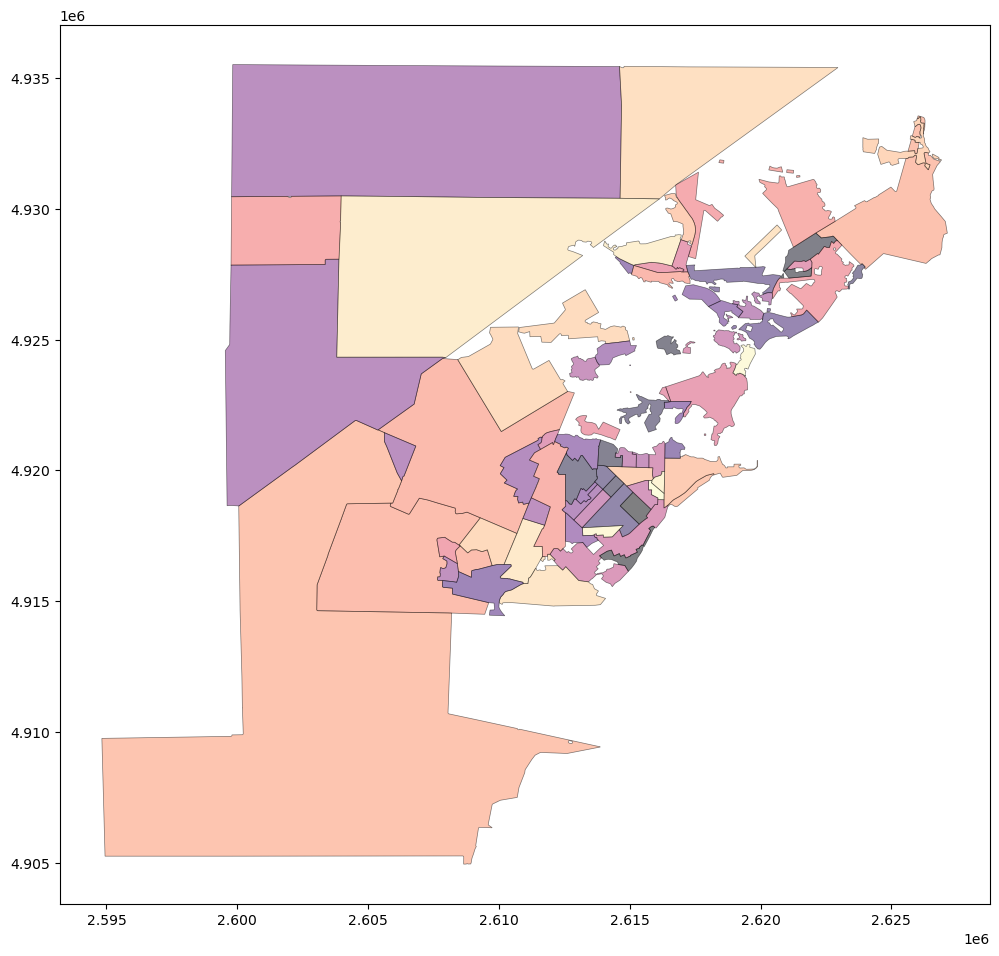

In [47]:
barrios.plot("nombre",
             figsize = (12, 20),
             linewidth = 0.5,
             edgecolor = "black",
             cmap = "magma_r",
             alpha = 0.5,
             )

In [48]:
barrios.crs

<Projected CRS: EPSG:22182>
Name: POSGAR 94 / Argentina 2
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Argentina - between 70°30'W and 67°30'W, onshore.
- bounds: (-70.5, -54.9, -67.49, -24.08)
Coordinate Operation:
- name: Argentina zone 2
- method: Transverse Mercator
Datum: Posiciones Geodesicas Argentinas 1994
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [49]:
radios = gpd.read_file(r"C:\Users\UserMCR\Desktop\Agustín\censo2022\Proyecto\GeoPandasOptimizado\4326\radios.shp")
radios.explore()

In [59]:
barrios_x_viv = gpd.read_file(r"C:\Users\UserMCR\Desktop\Agustín\GIS\proyecto principal censo\join barrios x link poblacion\shp join barrios x link poblacion\join_barrios_x_link_pob.shp")
barrios_x_viv.explore("join_barri",
                        scheme = "naturalbreaks",
                        k = 7,
                        cmap = "magma_r")

c:\ProgramData\anaconda3\envs\GIS\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\ProgramData\anaconda3\envs\GIS\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

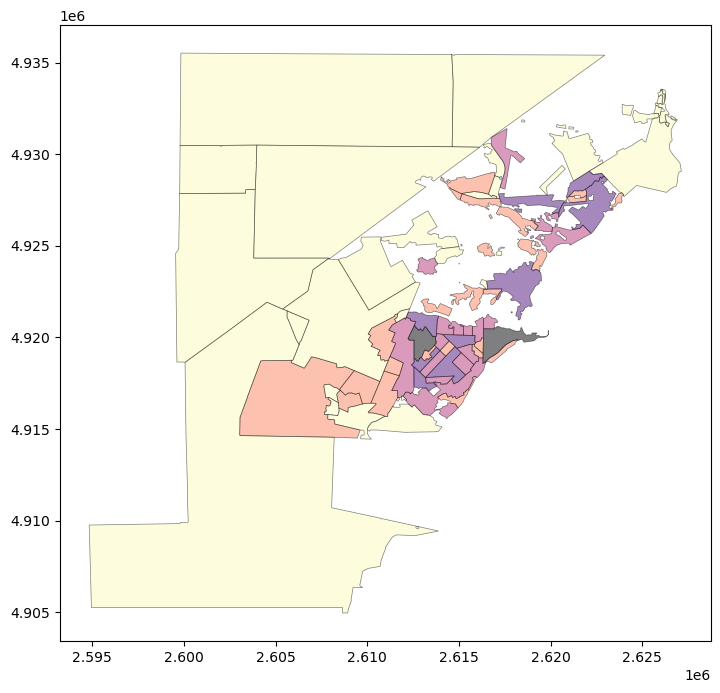

In [62]:
barrios_x_viv.plot("join_barri",
             figsize = (10, 8),
             linewidth = 0.5,
             edgecolor = "black",
             cmap = "magma_r",
             alpha = 0.5,
             scheme = "naturalbreaks"
             )